In [1]:
# ---
# execute:
#   enabled: false
# ---

# Oliners Spotify Emotional Insights

Author: Dongim Lee, Ashley Yang, Vivian Mak

Run the cell below each time the notebook is started or restarted to
ensure that if you change any code in the library, this notebook will
use the latest version of the library code.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json

## 1. Introduction



### The Story

At Olin College, our community is uniquely united in the sense that, as opposed to other colleges with different majors and spread out public spaces, students here move through almost universally shared classes and particular college experiences. For instance, a first-year agonizing over their Design Nature hopper project could approach nearly any upperclassman and be regaled with stories, accompanied with varying fondness levels, of their own experience with the project and how first years have it easier. Similarly, it seems to be widely agreed upon that sophomore year is academically the most stressful year here, due to the combination of classes and the way responsibilities tend to pile on them.

Now we take a brief turn to thinking about music, specifically the theory that the music we listen to reflects something about ourselves and our emotional states. It’s both fun and interesting to think about–Spotify, one of the most popular music streaming services, has capitalized on this through features like their “daylist”, which gives premium users a daily updating playlist with titles, based on their music taste, such as “energizing pumped wednesday morning” or “shy kitsch tuesday afternoon”.

After considering these ideas, the possible patterns of Olin years as well as music listening history reflecting emotional states, we decided to explore the combination of them. Would the music tastes of the sophomores reflect their overall stressed and busy state? Would the first years listen to music that showed their supposed more carefree state? Conversely, are our music tastes less related to our emotional states than current trends?

To focus our exploration, our research question then became as follows: How do the emotional states of the four current Olin College class years compare to each other through the lyric sentiment of their top Spotify tracks?

Answering this question could potentially give us several significant insights centered around better understanding the student body at Olin College. Beyond suggesting the state of emotional health of certain class years, we believe that our results could potentially give us, at the very least, interesting points to think about in terms of the cultural trends of our time and extent of social cohesion in the student body. 

### Main Steps
In this project, we chose to answer our question through a series of steps that would allow us to look at five quantitative emotional scores (joy, sadness, fear, disgust, and anger) across each class year (class of 2027, 2026, 2025, and 2024). Broadly, we collected current top tracks from a roughly equal number of Olin students, “Oliners”, from each class year, analyzed the emotional sentiment of these tracks’ lyrics, and used the resulting scores to create visualization of this data. Our visualizations display the spread of emotions within each class year, how the spread of each class year compares to each other, and the overall frequency of each emotion. In this way, we were able to go broader and broader to view the emotional scores of Oliners’ music tastes in various lights.


## 2. Methodology


The data we wished to collect were ultimately the lyrics of the recent top tracks of Olin students of every class year, where we could then analyze them through an emotional sentiment analyzer. Our process for data collection and processing can be broken down into five main steps: 
1) Data collection through Oliner usernames & public playlists through Replayify
2) Using the Spotify API to get the current top tracks of our participants
3) Obtaining the lyrics for these tracks through the Genius Lyrics API
4) Translating any non-English lyrics into English through the Google Translate API (see reasoning below)
5) Running these lyrics through IBM’s Natural Language Processing API to get emotional scores 

### Data Collection
To start this process, we aimed to collect Spotify usernames from roughly 15 people per current Olin class year (freshmen, sophomores, juniors, and seniors). We collected these usernames through in-person canvassing. To make sure our data is not biased in any way, we got usernames from various locations at random times. This way, we would have an equal representation of everyone in each grade.

We met our target for freshmen, sophomores, and seniors, though in the final data processing we had to remove a few users from each year for data cleaning purposes (i.g long audiobook chapters showing up in a user’s top tracks). Unfortunately, though we tried our best to find willing juniors, we did fall short of our target for getting Spotify usernames from the Olin juniors. However, given that a significant portion of the junior class is abroad, we believe our data turns out to be more representative than we initially thought. 

Alongside the usernames, we also had each participant generate a public playlist of their top tracks of the last month through [Replayify](https://replayify.com/login). Replayify is a third-party application, using the Spotify API, that allows users to create a playlist of ranked top tracks from either their last month, past six months, or of all time. We opted to have our participants choose last month in order to have their top tracks reflect their current tastes and mood as much as possible. Though this extra step created additional work in our data collection, we chose to go this route to solve a problem we ran into. Early on, we found that, with just the participant’s username, we were unable to use the Spotify API to directly get recent top tracks from our participants. Having everyone create a public playlist through Replayify allowed us to obtain these current top tracks by using the Spotify API to access this playlist and thereby the top tracks inside. This also had the added benefit of creating consistency in the way we obtained everyone’s top tracks.

### Spotify API

After having Olin Spotify users create a public playlist of their top tracks from the last month, we used the [Spotify API](https://developer.spotify.com/documentation/web-api/reference/get-users-top-artists-and-tracks) to extract the top ten songs and the corresponding artist and song names. We wanted to be able to adjust the amount of data we are processing, so the number of top tracks was adjustable. To pass the data in an organized way, we formatted the top tracks in the following format:
[((artist1, song1), (artist2, song2), ...), ((artist1, song1), (artist2, song2), ...), ...]
as a list of tuples (for each user) containing ten tuples of their top tracks with the artist name and song name.

To prevent passing unnecessary data through each API, we created four lists, one for each class, so we don’t have to keep track of a user’s year. This also made it easier for us to visualize the data and answer our question. 

### Genius API

With the formatted top tracks data from the Spotify API, we ran it against the [Genius API](https://lyricsgenius.readthedocs.io/en/master/) to get the lyrics for each song. This API allows us to save the data (ie. release date, id, artist, lyrics…) of a song to a JSON file which is all located in the Lyrics_File folder. The data is formatted as a dictionary, so to access the lyrics, we just call the lyrics key. 

However, when scraping the lyrics from Genius, there are many non-lyric parts included like the song structure (ie Verse, Chorus, Bridge…) and lyric credits. To make sure only the lyrics are getting saved and analyzed, we removed the non-lyrics part of the songs. The list of lyrics of a user’s top 10 songs is then mapped to their username in a dictionary.

### Google Translate API

As we collected more data, we noticed that the IBM Watson sentiment analysis (see below) wasn’t able to properly analyze songs that are in languages other than English. Because of the wide variety of non-English songs that Oliners listen to, we wanted to make sure our data is as representative and accurate as possible. We passed the lyrics through the [Google Translate API](https://cloud.google.com/translate/docs/reference/rest) to get the English translation. The data remained the same format with just the lyrics updated to the English translation of it.

### IBM Watson API

For each user, we put the lyrics of their top 10 tracks into the [IBM Watson Natural Language Understanding API](https://cloud.ibm.com/apidocs/natural-language-understanding?code=python#introduction) in order to run a sentiment analysis on the texts. As aforementioned, the analyser is currently only able to support the languages of English and French, so for consistency purposes, we chose to translate all non-English songs into English for the NLU sentiment analyzer. After running the analyzer, we receive an output of emotional state scores, which are Sadness, Joy, Disgust, Fear, and Anger, each with a rating between 0 and 1. Of note, these state scores are separate from each other; it does not mean that the five emotion scores will all add up to 1.

In our final process, we created a Python file with a function to take in a dictionary mapping users to a list of lyrics of their top tracks, and use the IBM Watson NLU API to return a dictionary now mapping users to a dictionary of their overall emotional scores. For instance, “vivian_username” might be a key in the returned dictionary mapping to a value of {sadness: 2, joy: 3, fear: 0.5, disgust: 0, anger: 1}.

### Overall Data Generation & Processing

Each of the API processes described above was run from a Juptyer notebook, “data_processing.ipynb”, which we used as our main data processing hub. After running our data through the API-related functions, our data was in the form of four dictionaries mapping users to their emotional scores, with each dictionary representing a class year and their representative students inside. We further processed this data by aggregating and then averaging the emotional scores for each year to get the final data of a list of four dictionaries (once again, each dictionary representing a class year), with each dictionary mapping emotion to its score for the overall class year. This list was then written to a separate JSON file in order to store our final processed data without the need to generate it every time we wished to use it. 

### Data Visualization
 
Our approach to visualizing the data was based around increasingly broader comparisons of the class emotional scores we generated in the previous step. We used Matplotlib in order to create our three visualizations: pie charts for the distribution of emotional scores for each class year, a stacked bar chart comparing the class years against each other, and a heat map looking at the overall frequency of the different emotions in the student body. 


## 3. Results

We created three insightful visualizations to analyze the emotion of Oliners based on their Spotify top tracks:
1. Pie charts to show distribution of emotions within each year
2. Stacked bar charts to show distribution of emotions across different years
3. Heatmap to show general distribution of emotions

In [4]:
# Open and load the JSON file back into a Python list
with open('list_averaged_scores.json', 'r') as json_file:
    list_averaged_scores = json.load(json_file)

emotions = ['sadness', 'joy', 'fear', 'disgust', 'anger']
year_labels = ['Freshmen', 'Sophomores', 'Juniors', 'Seniors']

### Visualization 1: Pie Chart

For each of the four class years, we will generate a pie chart to look at the snapshot of emotional distribution within the academic year and what that distribution might tell us. The following code will start with the freshmen:

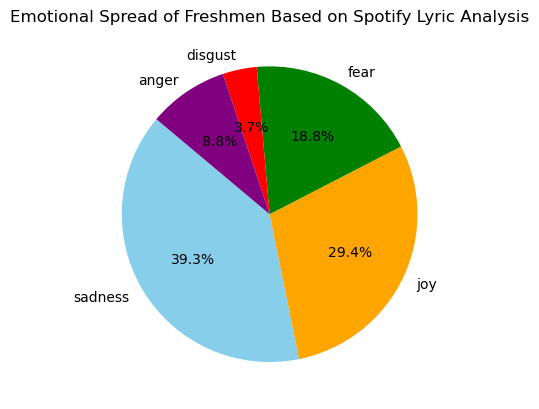

In [5]:
# plotting pie chart of freshmen emotional scores
df = pd.DataFrame(list_averaged_scores[0].values(), index=list_averaged_scores[0].keys(), columns=['Intensity'])
pie_plot = df.plot(kind='pie', y='Intensity', colors=['skyblue', 'orange', 'green', 'red', 'purple'],
                autopct='%1.1f%%', startangle=140, legend=False)
pie_plot.set_title(f'Emotional Spread of {year_labels[0]} Based on Spotify Lyric Analysis')
pie_plot.set_ylabel('')

plt.show()

Here, the freshmen show sadness as having the highest proportion of scores, with 39.3% compared to the next highest of joy at 29.4%. This is a significant jump of over 10%, which suggests that sadness is the predominant emotion among freshmen. Now, we will generate the distribution for the sophomores:

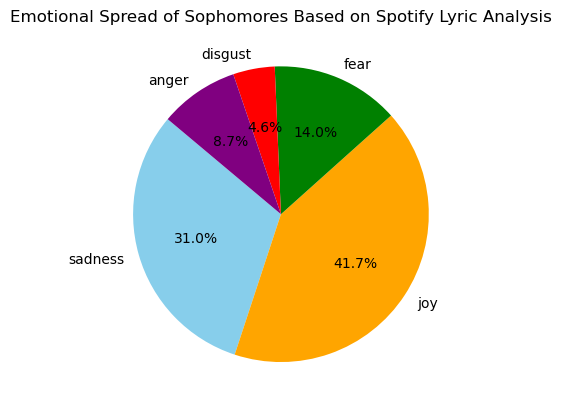

In [6]:
# plotting pie chart of sophomores emotional scores
df = pd.DataFrame(list_averaged_scores[1].values(), index=list_averaged_scores[1].keys(), columns=['Intensity'])
pie_plot = df.plot(kind='pie', y='Intensity', colors=['skyblue', 'orange', 'green', 'red', 'purple'],
                autopct='%1.1f%%', startangle=140, legend=False)
pie_plot.set_title(f'Emotional Spread of {year_labels[1]} Based on Spotify Lyric Analysis')
pie_plot.set_ylabel('')

plt.show()

For the sophomores, joy is the emotion with the highest proportion of scores, at 41.7%. This is also a significant jump from the next highest emotion of sadness, which is 31.0%. From these results, it appears that joy should be the predominant emotion among sophomores. 

Let's look at the distribution for juniors:

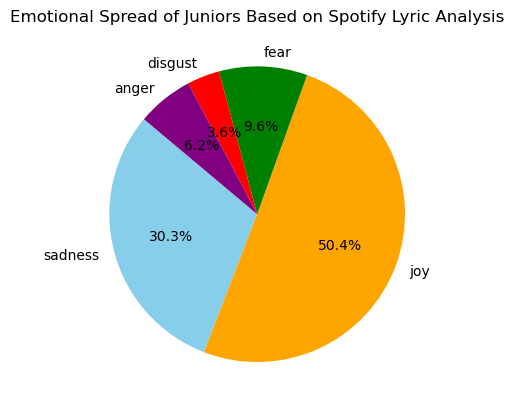

In [7]:
# plotting pie chart of juniors emotional scores
df = pd.DataFrame(list_averaged_scores[2].values(), index=list_averaged_scores[2].keys(), columns=['Intensity'])
pie_plot = df.plot(kind='pie', y='Intensity', colors=['skyblue', 'orange', 'green', 'red', 'purple'],
                autopct='%1.1f%%', startangle=140, legend=False)
pie_plot.set_title(f'Emotional Spread of {year_labels[2]} Based on Spotify Lyric Analysis')
pie_plot.set_ylabel('')

plt.show()

Interestingly, joy is not only the emotion with the highest proportion of scores for the juniors, but also the emotion with a slight majority of the scores. This would indicate that the juniors experience joy the most often out of their emotions. 

Finally, we will look at the distribution for the seniors:

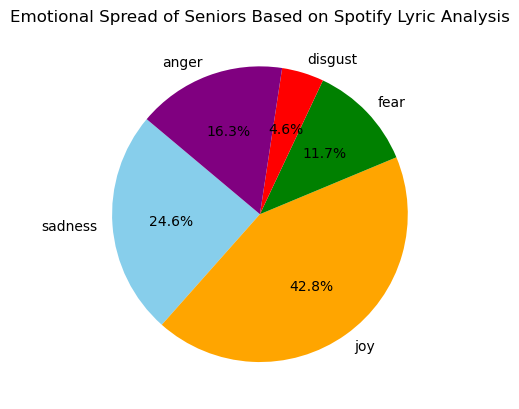

In [8]:
# plotting pie chart of seniors emotional scores
df = pd.DataFrame(list_averaged_scores[3].values(), index=list_averaged_scores[3].keys(), columns=['Intensity'])
pie_plot = df.plot(kind='pie', y='Intensity', colors=['skyblue', 'orange', 'green', 'red', 'purple'],
                autopct='%1.1f%%', startangle=140, legend=False)
pie_plot.set_title(f'Emotional Spread of {year_labels[3]} Based on Spotify Lyric Analysis')
pie_plot.set_ylabel('')

plt.show()

For the seniors, joy is the emotion with the highest proportion at 42.8%. From the proportion of sadness, the next highest emotion at 24.6%, there is a considerable jump of almost 20% to the proportion of joy. This means that there is 1.7x the proportion of joy in relation to the proportion of sadness, which indicates that joy is by far the leading emotion for seniors. Additionally, there is a significant proportion of anger in the seniors, at 16.3%.

These pie charts give us a more detailed breakdown of the emotional distribution within each year. However, because we really want to look at comparisons of these distributions across the four years to see if there similarities or differences between the years, we will now look at a stacked bar chart of the four years.

### Visualization 2: Stacked Bar 

The stacked bar chart offers a comprehensive view of emotional trends across different academic years. The following code will generate the stacked bar chart.

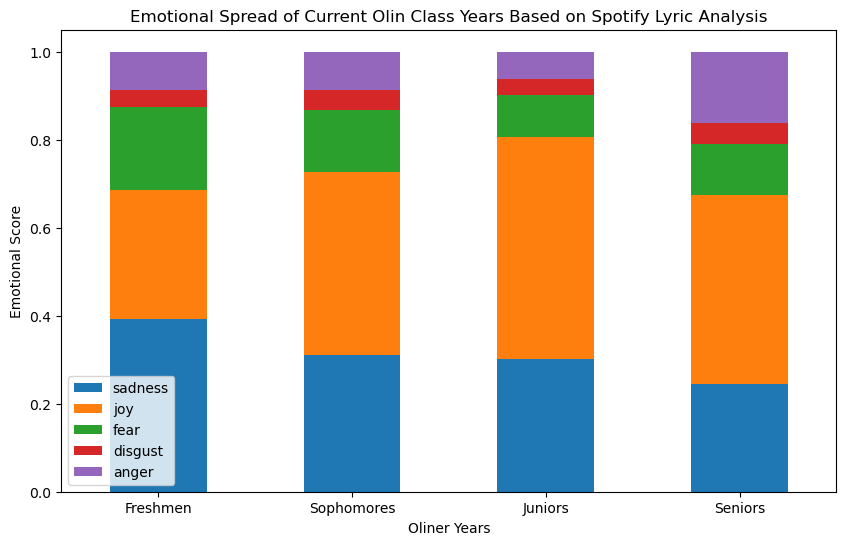

In [9]:
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(list_averaged_scores, index=year_labels)

# Plotting stacked bar chart
stack_bar_plot = df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xticks(rotation=0)
stack_bar_plot.set_xlabel('Oliner Years')
stack_bar_plot.set_ylabel('Emotional Score')
stack_bar_plot.set_title('Emotional Spread of Current Olin Class Years Based on Spotify Lyric Analysis')
stack_bar_plot.legend()
plt.show()

Compared to other years, freshmen notably show the lowest levels of joy and the highest levels of sadness and fear, suggesting potential adjustment challenges to college life or the stress resulting from a significant and unusual portion of current first-years who are taking 20 credits. Conversely, juniors demonstrate the highest proportion of joy among all years, hinting at a possible scenario where those remaining at Olin are particularly fond of the institution, while others may have opted for study abroad programs or LOAs. Additionally, seniors display heightened levels of anger, potentially reflecting increased stress or frustration as they approach graduation. 

### Visualization 3: Heatmap

To shift a slight focus onto the frequencies of the emotions themselves, we will now look at a heatmap of the frequencies of the emotional scores by year. 

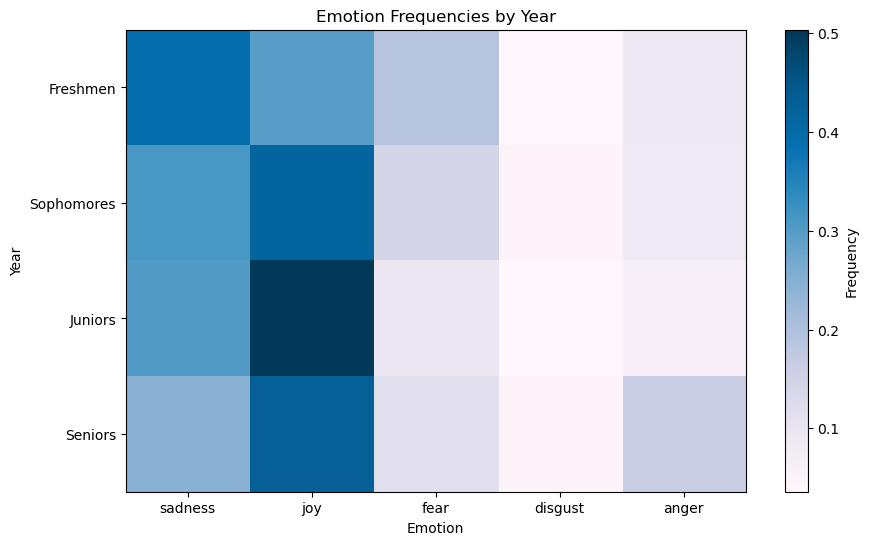

In [10]:
# Plotting heatmap
plt.figure(figsize=(10, 6))
plt.imshow(df, cmap='PuBu', aspect='auto')

plt.xticks(range(len(emotions)), emotions)
plt.yticks(range(len(year_labels)), year_labels)
plt.colorbar(label='Frequency')
plt.xlabel('Emotion')
plt.ylabel('Year')
plt.title('Emotion Frequencies by Year')
plt.show()

The heatmap visualizes emotion frequencies by year, highlighting sadness and joy as dominant emotions across all academic years. This suggests consistent overall emotional experiences among Oliners, characterized by a blend of melancholy and happiness in their academic journey.

### Key Takeaways
- Freshmen show a higher proportion of sadness and lower levels of joy compared to other years.
- Juniors show the highest levels of joy, perhaps related to the batch of juniors currently on campus.
- Seniors show heightened levels of anger, potentially reflecting increased stress or frustration.
- Sadness and joy emerge as dominant emotions among Oliners, regardless of academic year.


## 4. Conclusion


In conclusion, our analysis offers valuable insights into the emotional landscape of Oliners based on their Spotify listening habits. By exploring the distribution of emotions across academic years, we uncover distinct patterns that shed light on students' emotional experiences throughout their college tenure. Through analyzing the lyric sentiment of their top Spotify tracks, our results indicate that the emotional states of Olin College class years do differ from each other. These differences could be connected to class-wide trends that cause a certain class year to experience more of certain emotions than other years. Overall though, sadness and joy are the dominant emotions among Oliners, which is to be expected from a blend of people and their various highs, lows, and life experiences factoring into their emotions.

At the same time, we can learn to consider that the music that people listen to, particularly Oliners, may not be fully reflective of their emotional states. Our results could alternatively tell us something about the trends in music that are currently popular or ones that are circulating among groups in each class year.

### Ethical Considerations

For the ethical considerations surrounding data sourcing, it's essential to prioritize user privacy and data integrity. In our project, we ensured that we strictly adhered to ethical guidelines by refraining from using users' data for any purpose other than our intended analysis. We focused solely on accessing the data necessary for our study, which primarily consisted of top track playlists. By adhering to these ethical principles, we upheld the integrity of our data sourcing process and demonstrated our commitment to responsible data practices.

However, although we deleted any history of our users’ login history from our computers, we realize that there are possible privacy concerns surrounding the amount of accessible data with a simple username. We also mentioned to the users to remind them to put their top tracks playlist on private after 48 hours if they wished, but we realized that once we have access to the data, the process of saving everything to another file is very simple. This means that once your data is shared, even if you remove yourself from the database, your data will always exist somewhere. 

We must also keep in mind that we cannot ethically draw strong conclusions about the mental health of our classmates based on this project. We can find correlations but no concrete causations.

### Reflection 

Throughout the project, we faced significant challenges in integrating and passing data from four distinct APIs, each with its unique data format. This made our process more complicated, requiring careful consideration and adaptation to ensure the compatibility of data across APIs. With the variety of English & non-English songs and audiobooks available on Spotify, we ran into many issues with special cases where the data would not be accepted by the IBM Watson API. This issue caused us to spend additional time researching and implementing a Google Translate API, and filtering out “top_tracks” that were just audio books.

Some lessons and insights that we took away were to better plan out our course of action and potential failure points beforehand. Although this wasn’t a significant challenge to fix, making sure to communicate how data is going to be transferred between each person would’ve been helpful as we would consider how our function is written from the beginning. We also could have collected our data further in advance, since even though we were able to build the framework for our data processing quite efficiently without all our data, we ran into some data cleaning obstacles in our final processing that required us to remove some data points. Collecting our data further in advance would’ve allowed us to compensate for the removed data by giving us time to get replacements. When collecting usernames from users, another important datapoint we could’ve gotten was a quick interview of major events or stressors in their lives. This would significantly improve our ability to interpret our results.

### Future Work

There are a number of ways we could see ourselves improving this project in the future. collecting more data could enhance the representativeness of our findings, providing a more comprehensive understanding of the student population's emotional distribution. Additionally, incorporating tempo analysis into our methodology could refine our emotional analysis. By considering not only the lyrical content but also the tempo of songs, which is a significant part in shaping the mood of music, we can offer a more nuanced interpretation of the listener's emotions. If possible, we would have also preferred to find a more accurate way to handle non-English lyrics beyond machine translation, as the current capabilities of machine translation can miss nuances in emotion and meaning as well as vary widely in its accuracy for different languages. 

In terms of reaching conclusions of emotional states, we could have done a quick interview of each user to get a sense of what their daily lives looked like. This wouldn’t allow us to determine a casual relationship, however, we would be able to better explain the varying trends in each class and across classes. For example, if the amount of SCOPE work was a common theme among seniors, we could predict SCOPE as a major contributing factor for sadness. In the contrary, if the excitement of graduation and moving on in life was a common theme, their high happiness levels could be related to this big event.